# A121 Group 2 : SC1015 Mini Project 

---

Data set of choice : https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021

For our project, we will look at the health - related metrics of the Top 44 countries and answer the Data Science Questions below related to it. 


We believe that Health and Happiness are universal factors in determining one's Qualtity of life. Hence, we want to explore how are we able to achieve a Happy and Healthy Country and bring the best quality of life to everyone.

Question 1 :

**Problem Forumlation** : How can we expect the happiness value of a city to be , given related health metrics of the country? 

**Data Science Question** : Are we able to predict the `Happiness Levels` of a city based on its other metrics? 

---

Question 2 :

**Problem Forumlation** : What determines if a City is both Happy and Healthy?

**Data Science Question** : What are the characterstics between Clusters of cities, where we cluster them based on `Happiness Levels` and `Life Expectency`.

---

Question 3 : 

**Problem Forumlation** : Can we identify underlying patterns or relationships among cities based on their health-related metrics?

**Data Science Question** : Is there a structure within the Cities of the data set? 

---

## Part 1 : Data Cleaning & Preparation

The first part of the project would be cleaning and preparing the data for Exploratory Data Analysis, and shape the data such that it fits into the machine learning model of our choice. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
sb.set()

In [2]:
CityData = pd.read_csv('healthy_lifestyle_city_2021.csv')
CityData

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


In [3]:
CityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [4]:
CityData.describe()

,Rank,Life expectancy(years) (Country),Happiness levels(Country),Outdoor activities(City),Number of take out places(City)
count,44.000000,44.00000,44.000000,44.000000,44.000000
mean,22.500000,78.17500,6.435000,213.977273,1443.113636
std,12.845233,5.30437,0.991202,127.190297,1388.803270
min,1.000000,56.30000,3.570000,23.000000,250.000000
25%,11.750000,75.40000,5.870000,125.250000,548.000000
50%,22.500000,80.40000,6.900000,189.500000,998.000000
75%,33.250000,81.80000,7.175000,288.250000,1674.250000
max,44.000000,83.20000,7.800000,585.000000,6417.000000


Looking at the data , we notice that 

`Sunshine hours (City)` , `Pollution(Index score) (City)` , `Annual avg. hours worked` contains '-' , which is a representation for a NULL. 

We will fill these NULL Values with the Median of that Column, as the Median is not heavily affected by outliers, unlike mean. This gives us a good substituition of the NULL Values. 

In [5]:
CityData['Sunshine hours(City)'] = CityData['Sunshine hours(City)'].replace('-', np.nan)
CityData['Sunshine hours(City)'] = pd.to_numeric(CityData['Sunshine hours(City)'], errors='coerce')
CityData['Sunshine hours(City)'] = CityData['Sunshine hours(City)'].fillna(CityData['Sunshine hours(City)'].median())

CityData['Pollution(Index score) (City)'] = CityData['Pollution(Index score) (City)'].replace('-', np.nan)
CityData['Pollution(Index score) (City)'] = pd.to_numeric(CityData['Pollution(Index score) (City)'], errors='coerce')
CityData['Pollution(Index score) (City)'] = CityData['Pollution(Index score) (City)'].fillna(CityData['Pollution(Index score) (City)'].median())
CityData

CityData['Annual avg. hours worked'] = CityData['Annual avg. hours worked'].replace('-', np.nan)
CityData['Annual avg. hours worked'] = pd.to_numeric(CityData['Annual avg. hours worked'], errors='coerce')
CityData['Annual avg. hours worked'] = CityData['Annual avg. hours worked'].fillna(CityData['Annual avg. hours worked'].median())
CityData

CityData

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,£1.92,20.40%,81.2,30.93,1434.0,7.44,422,1048,£34.90
1,Sydney,2,2636.0,£1.48,29.00%,82.1,26.86,1712.0,7.22,406,1103,£41.66
2,Vienna,3,1884.0,£1.94,20.10%,81.0,17.33,1501.0,7.29,132,1008,£25.74
3,Stockholm,4,1821.0,£1.72,20.60%,81.8,19.63,1452.0,7.35,129,598,£37.31
4,Copenhagen,5,1630.0,£2.19,19.70%,79.8,21.24,1380.0,7.64,154,523,£32.53
5,Helsinki,6,1662.0,£1.60,22.20%,80.4,13.08,1540.0,7.80,113,309,£35.23
6,Fukuoka,7,2769.0,£0.78,4.30%,83.2,52.64,1644.0,5.87,35,539,£55.87
7,Berlin,8,1626.0,£1.55,22.30%,80.6,39.41,1386.0,7.07,254,1729,£26.11
8,Barcelona,9,2591.0,£1.19,23.80%,82.2,65.19,1686.0,6.40,585,2344,£37.80
9,Vancouver,10,1938.0,£1.08,29.40%,81.7,24.26,1670.0,7.23,218,788,£31.04


Now that we have filled in all the NULL values, we will process other variables for analysis too.

`Cost of a bottle of water(City)` , `Cost of a monthly gym membership(City)` , `Obesity levels(Country)` Contains Characters that would affect the analysis.

We will remove them and change the variable data type from *object* to *float64*

In [6]:
if not pd.api.types.is_string_dtype(CityData['Cost of a bottle of water(City)']):
    CityData['Cost of a bottle of water(City)'] = CityData['Cost of a bottle of water(City)'].astype(str)

CityData['Cost of a bottle of water(City)'] = CityData['Cost of a bottle of water(City)'].str.replace('£','')
CityData['Cost of a bottle of water(City)'] = CityData['Cost of a bottle of water(City)'].apply(np.float64)

CityData['Obesity levels(Country)'] = CityData['Obesity levels(Country)'].str.replace('%','')
CityData['Obesity levels(Country)'] = CityData['Obesity levels(Country)'].apply(np.float64)

CityData['Cost of a monthly gym membership(City)'] = CityData['Cost of a monthly gym membership(City)'].str.replace('£','')
CityData['Cost of a monthly gym membership(City)'] = CityData['Cost of a monthly gym membership(City)'].apply(np.float64)

CityData

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Sydney,2,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406,1103,41.66
2,Vienna,3,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132,1008,25.74
3,Stockholm,4,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129,598,37.31
4,Copenhagen,5,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,32.53
5,Helsinki,6,1662.0,1.60,22.2,80.4,13.08,1540.0,7.80,113,309,35.23
6,Fukuoka,7,2769.0,0.78,4.3,83.2,52.64,1644.0,5.87,35,539,55.87
7,Berlin,8,1626.0,1.55,22.3,80.6,39.41,1386.0,7.07,254,1729,26.11
8,Barcelona,9,2591.0,1.19,23.8,82.2,65.19,1686.0,6.40,585,2344,37.80
9,Vancouver,10,1938.0,1.08,29.4,81.7,24.26,1670.0,7.23,218,788,31.04


In [7]:
CityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     float64
 3   Cost of a bottle of water(City)         44 non-null     float64
 4   Obesity levels(Country)                 44 non-null     float64
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     float64
 7   Annual avg. hours worked                44 non-null     float64
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


Now that we have cleaned and prepared the data set into the data types that we want to work with , we will continue with Exploratory Data Analysis. 

## Part 2 : Exploratory Data Analysis
---


We will now explore the Data Set in general. We hope to find relationships between the variables and get a general sensing of the relationship between our Response : `Happiness levels(Country)` & the predictors which are the other columns.


We will first drop `City` & `Rank` as it does not provide any insights as of yet.

In [8]:
CityDataEDA = pd.DataFrame(CityData[["Sunshine hours(City)", "Cost of a bottle of water(City)",
                                     "Obesity levels(Country)", "Life expectancy(years) (Country)", 
                                     "Pollution(Index score) (City)", "Annual avg. hours worked",
                                     "Happiness levels(Country)","Outdoor activities(City)",
                                     "Number of take out places(City)", "Cost of a monthly gym membership(City)"]])
CityDataEDA

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,34.90
1,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406,1103,41.66
2,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132,1008,25.74
3,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129,598,37.31
4,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,32.53
5,1662.0,1.60,22.2,80.4,13.08,1540.0,7.80,113,309,35.23
6,2769.0,0.78,4.3,83.2,52.64,1644.0,5.87,35,539,55.87
7,1626.0,1.55,22.3,80.6,39.41,1386.0,7.07,254,1729,26.11
8,2591.0,1.19,23.8,82.2,65.19,1686.0,6.40,585,2344,37.80
9,1938.0,1.08,29.4,81.7,24.26,1670.0,7.23,218,788,31.04


In [9]:
CityDataEDA.describe().round(2)

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
count,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00
mean,2241.77,1.17,21.93,78.18,51.16,1676.18,6.44,213.98,1443.11,40.42
std,561.42,0.72,10.20,5.30,21.60,155.06,0.99,127.19,1388.80,15.01
min,1405.00,0.15,3.90,56.30,13.08,1380.00,3.57,23.00,250.00,16.07
25%,1809.75,0.57,19.50,75.40,36.07,1576.50,5.87,125.25,548.00,31.31
50%,2066.00,1.19,22.30,80.40,52.64,1686.00,6.90,189.50,998.00,37.33
75%,2626.50,1.60,29.00,81.80,66.35,1773.75,7.18,288.25,1674.25,47.21
max,3542.00,3.20,36.20,83.20,91.74,2137.00,7.80,585.00,6417.00,73.11


Now that we have seen a quick mathematical summary of the variables, we will perform Uni-Variate Analysis on the individual variables.


*We split into 2 cells to allow for better visualization*

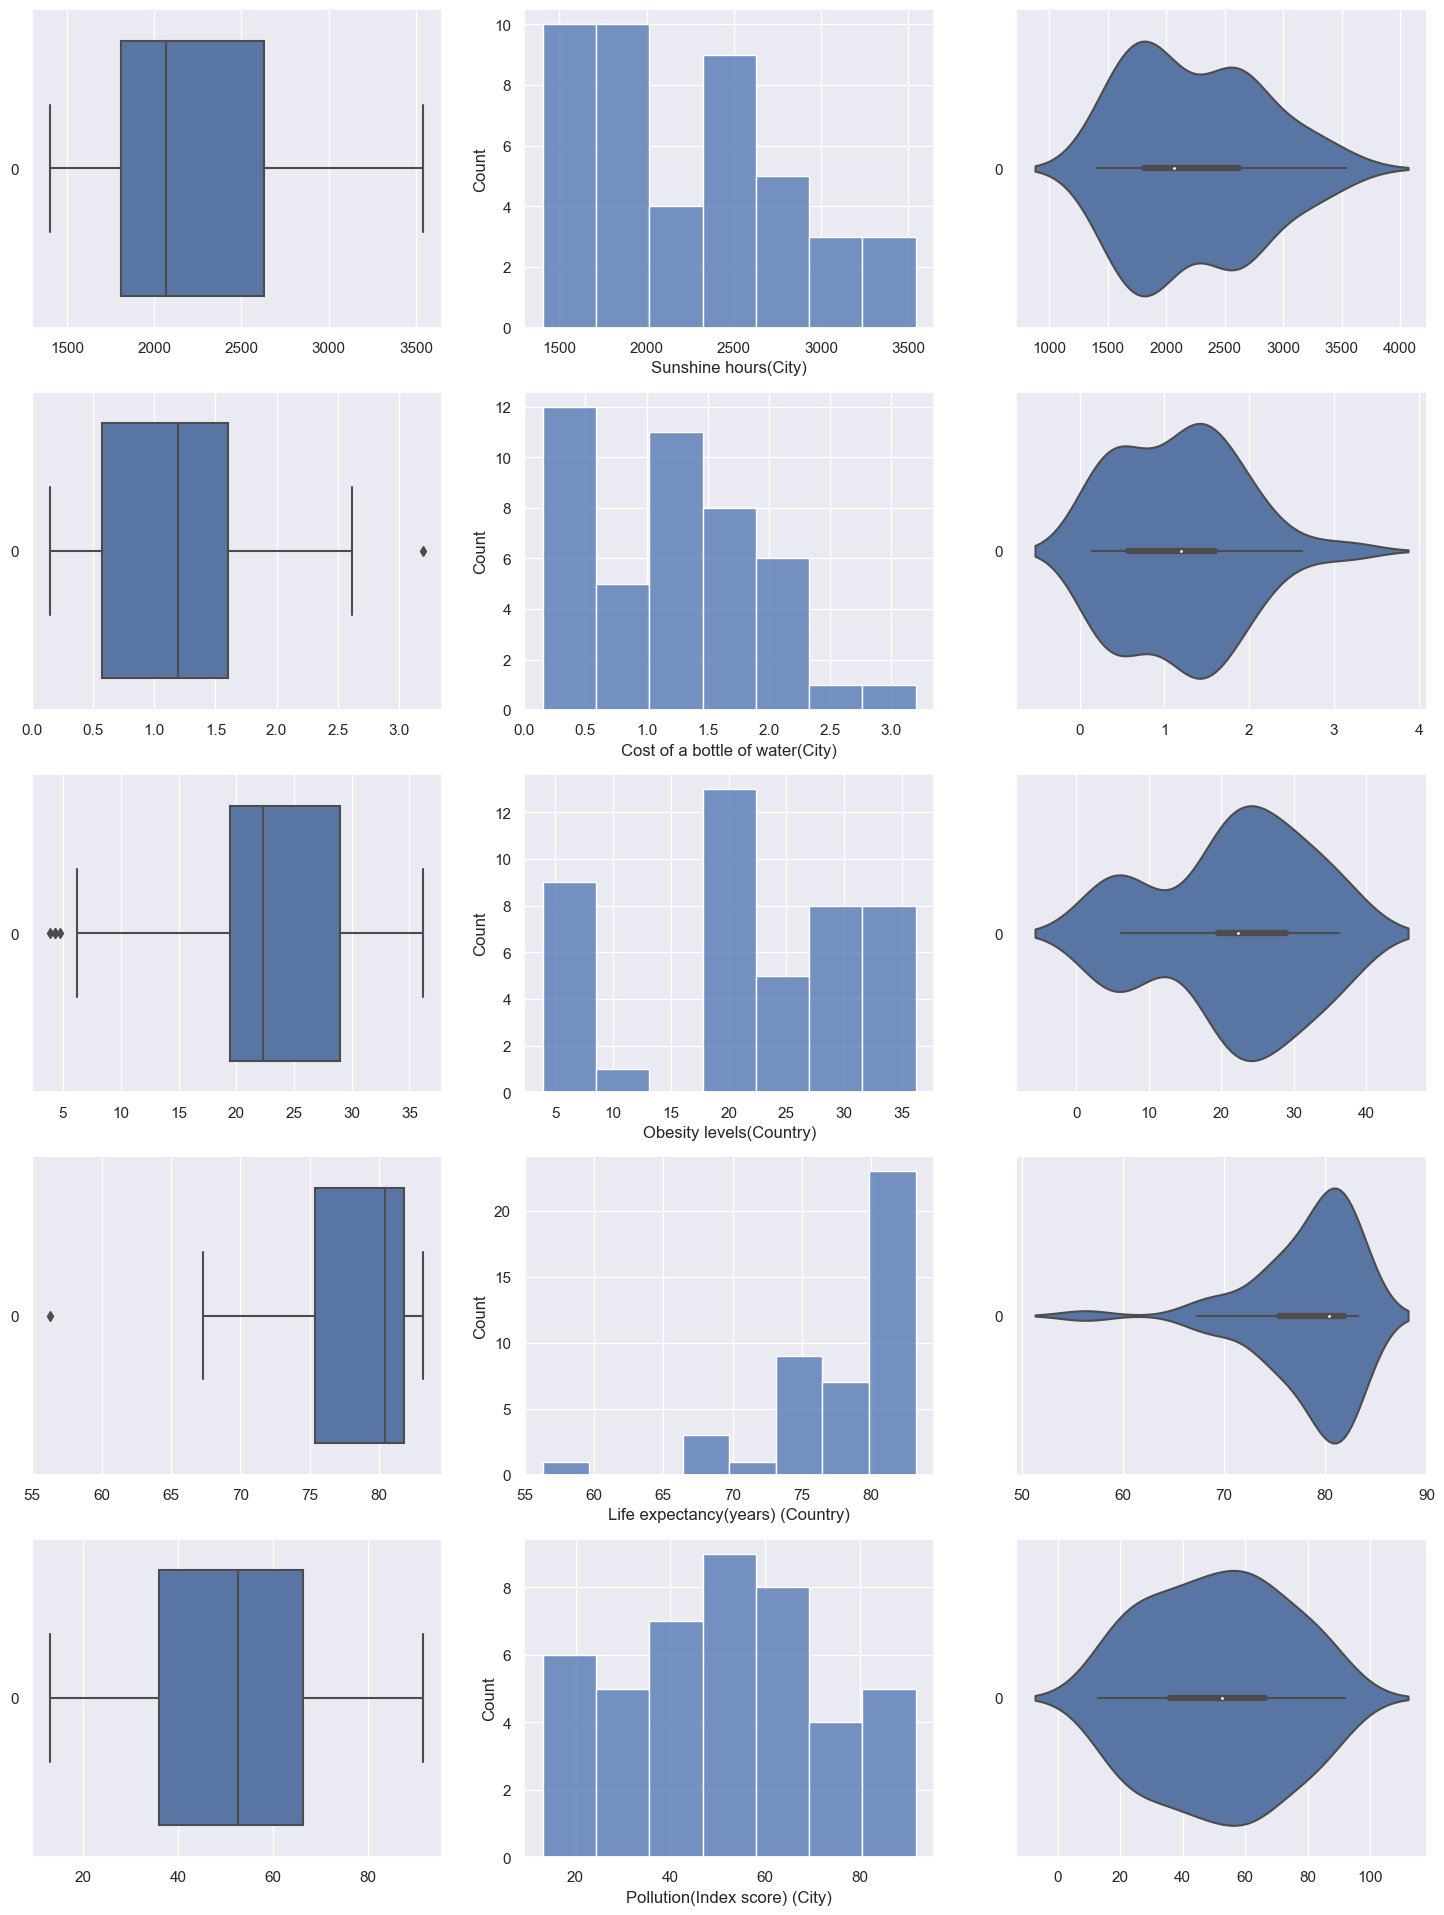

In [10]:
f, axes = plt.subplots(5, 3, figsize=(18, 24))

CityDataEDA1 = CityDataEDA.iloc[:, 0:5]

count = 0
for var in CityDataEDA1:
    sb.boxplot(data = CityDataEDA1[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = CityDataEDA1[var], ax = axes[count,1])
    sb.violinplot(data = CityDataEDA1[var], orient = "h", ax = axes[count,2])
    count += 1

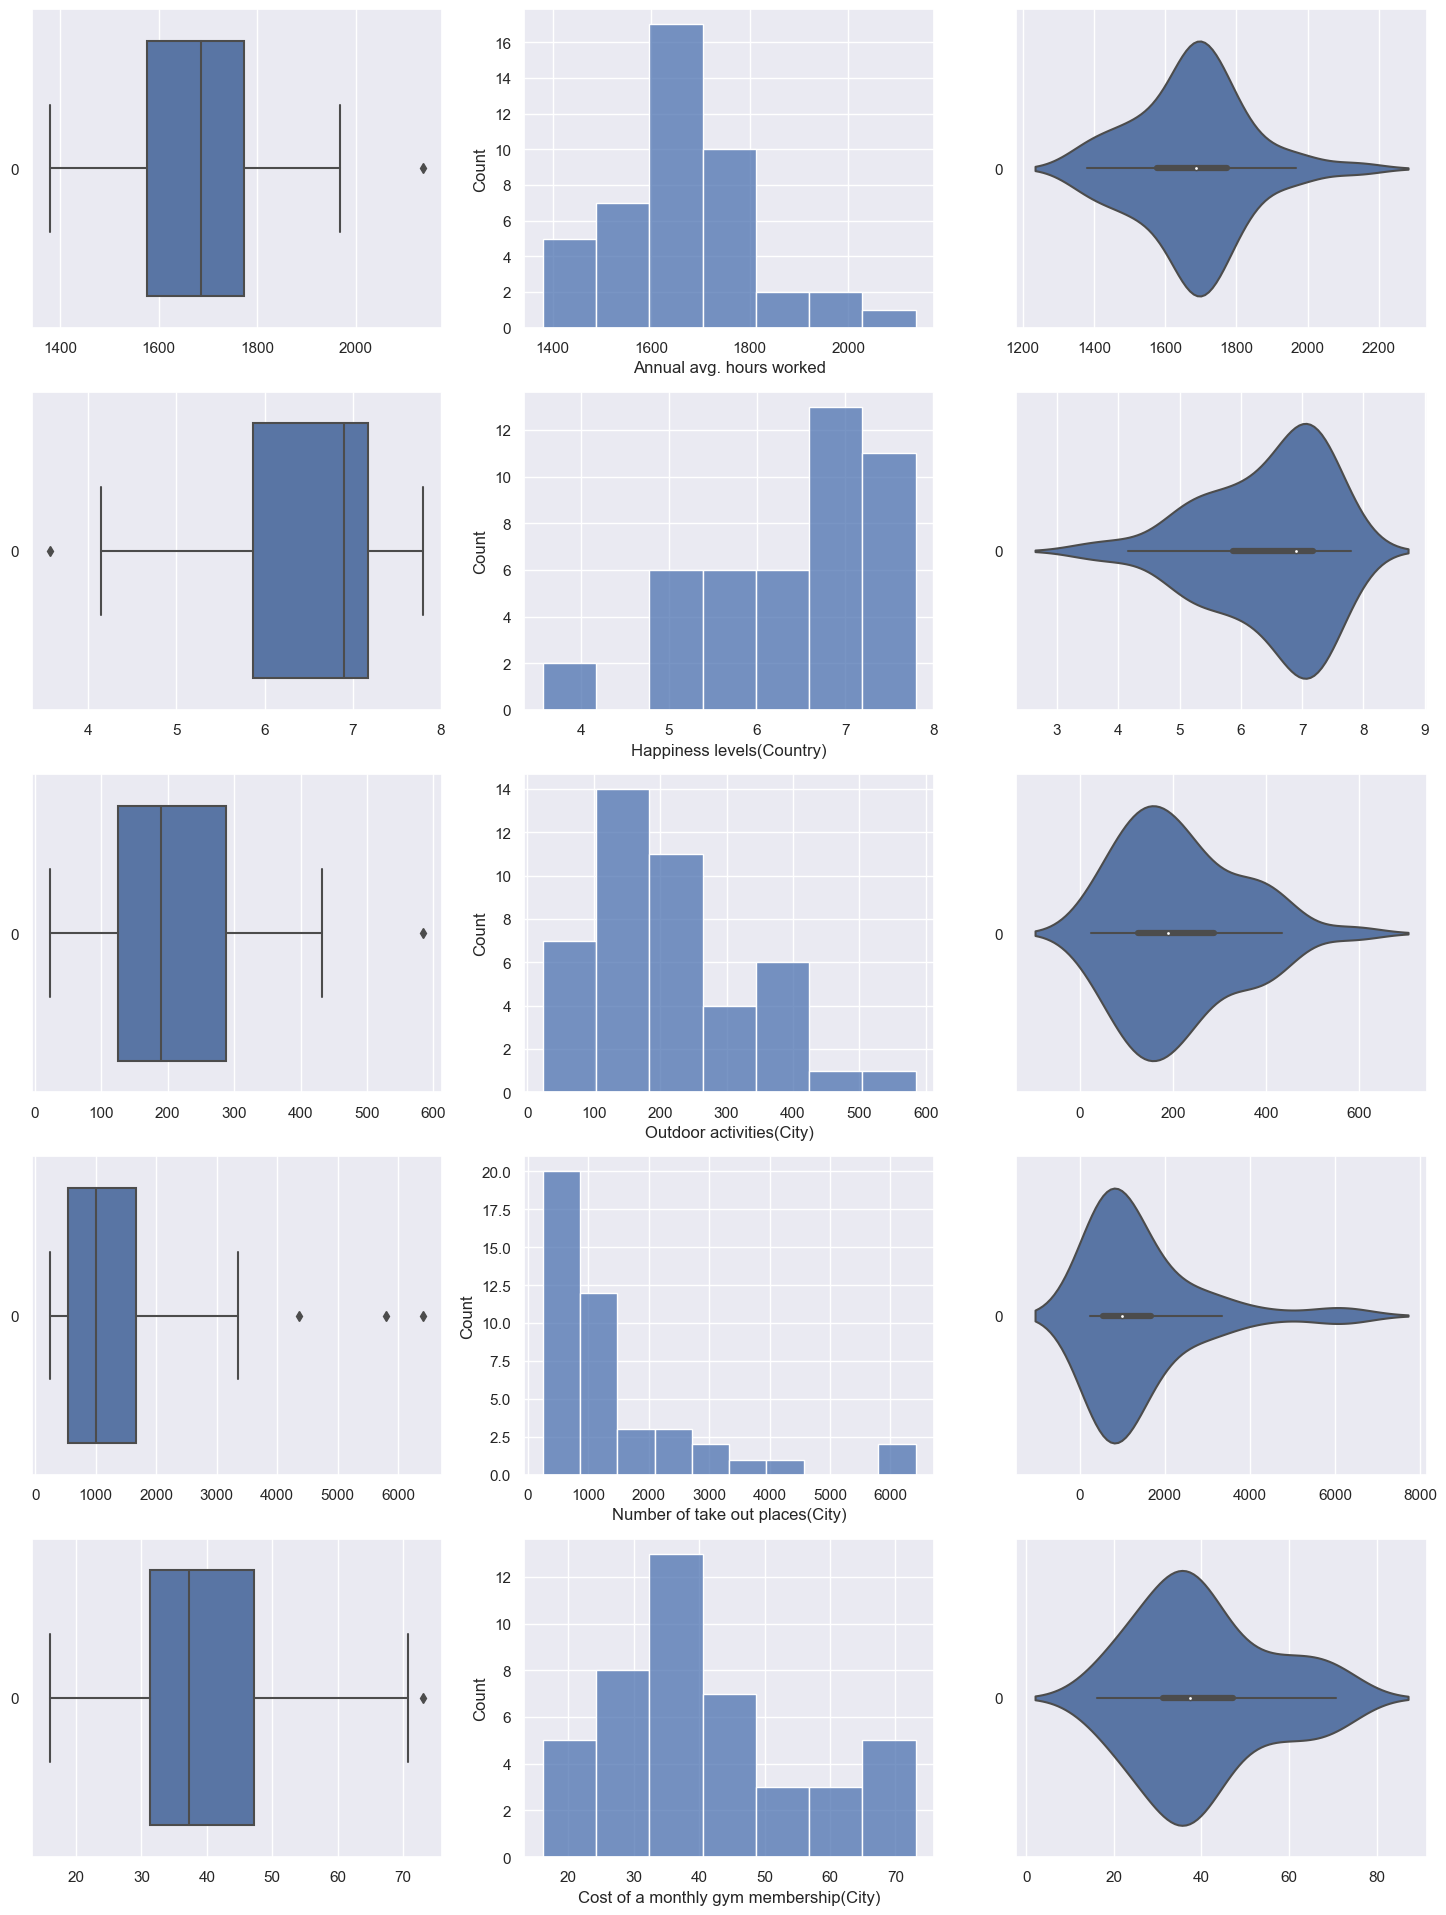

In [11]:
f, axes = plt.subplots(5, 3, figsize=(18, 24))

CityDataEDA2 = CityDataEDA.iloc[:, 5:10]

count = 0
for var in CityDataEDA2:
    sb.boxplot(data = CityDataEDA2[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = CityDataEDA2[var], ax = axes[count,1])
    sb.violinplot(data = CityDataEDA2[var], orient = "h", ax = axes[count,2])
    count += 1

From the Violin plots, we can observe that certain variables have a rather skewed violin plot. 

We will calculate the skewness of each variable and examine this further. 

In [12]:
skews = {var: CityDataEDA[var].skew() for var in CityDataEDA}

print("Skewness of each variable:\n")
# Print the skews
for var, skew in skews.items():
    print(var + ' = ' + str(skew))
    print() 

Skewness of each variable:

Sunshine hours(City) = 0.45957994308662925

Cost of a bottle of water(City) = 0.4604266147136096

Obesity levels(Country) = -0.4679912673634951

Life expectancy(years) (Country) = -2.098348326667041

Pollution(Index score) (City) = 0.01306410514651596

Annual avg. hours worked = 0.31808838388325916

Happiness levels(Country) = -0.9678386274732211

Outdoor activities(City) = 0.7927788840317203

Number of take out places(City) = 2.124173147056922

Cost of a monthly gym membership(City) = 0.6270940636183338



From the above, we see that most Variables are not skewed with the exception of some. 

`Life expectancy(years) (Country)` , `Number of take out places(City)` are the 2 variables that are the most skewed negatively and positively respectively.


Now that we have finished with Uni-Variate analysis, we will now do Bi-Variate Analysis and examine the relationship between the variables. We will first plot a heat-map to visualize the correlations.

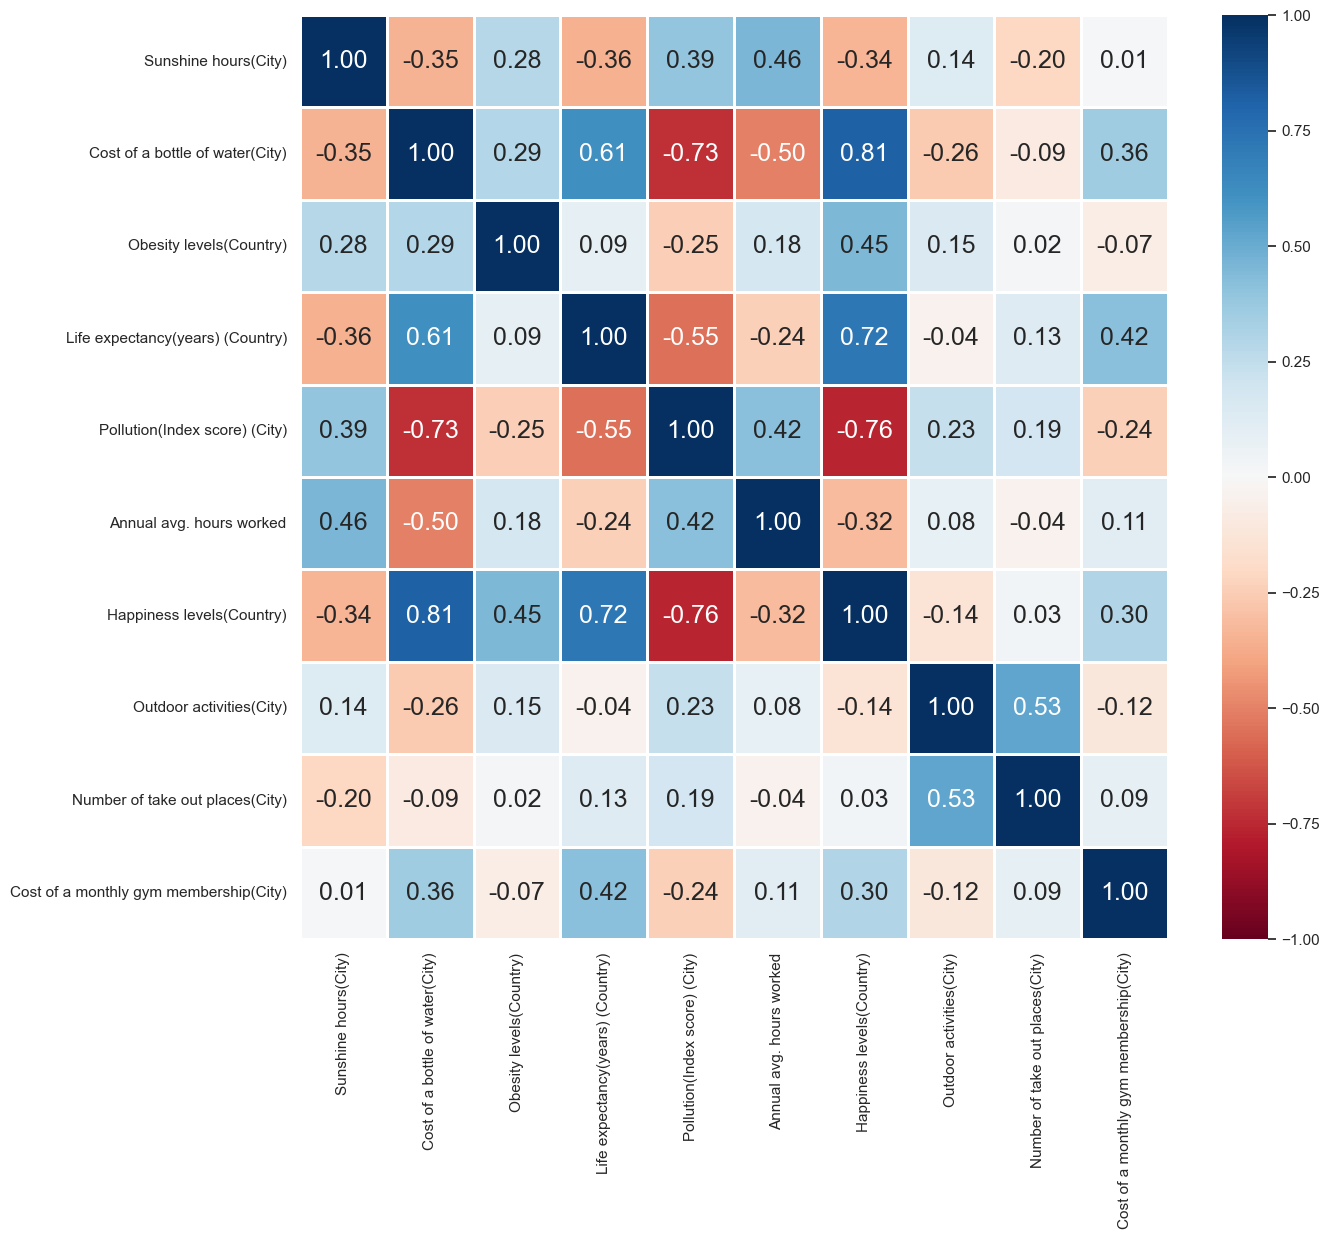

In [13]:
f = plt.figure(figsize=(14, 12))
sb.heatmap(CityDataEDA.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

plt.show()

To help us answer the question:

*How can we expect the happiness value of a city to be , given related health metrics of the country?* better , we will look at the relationship of each variable plotted against `Happiness levels(Country)`.

The following are the ScatterPlots & RegressionPLots.

*We will split into 2 cells for better visualization*

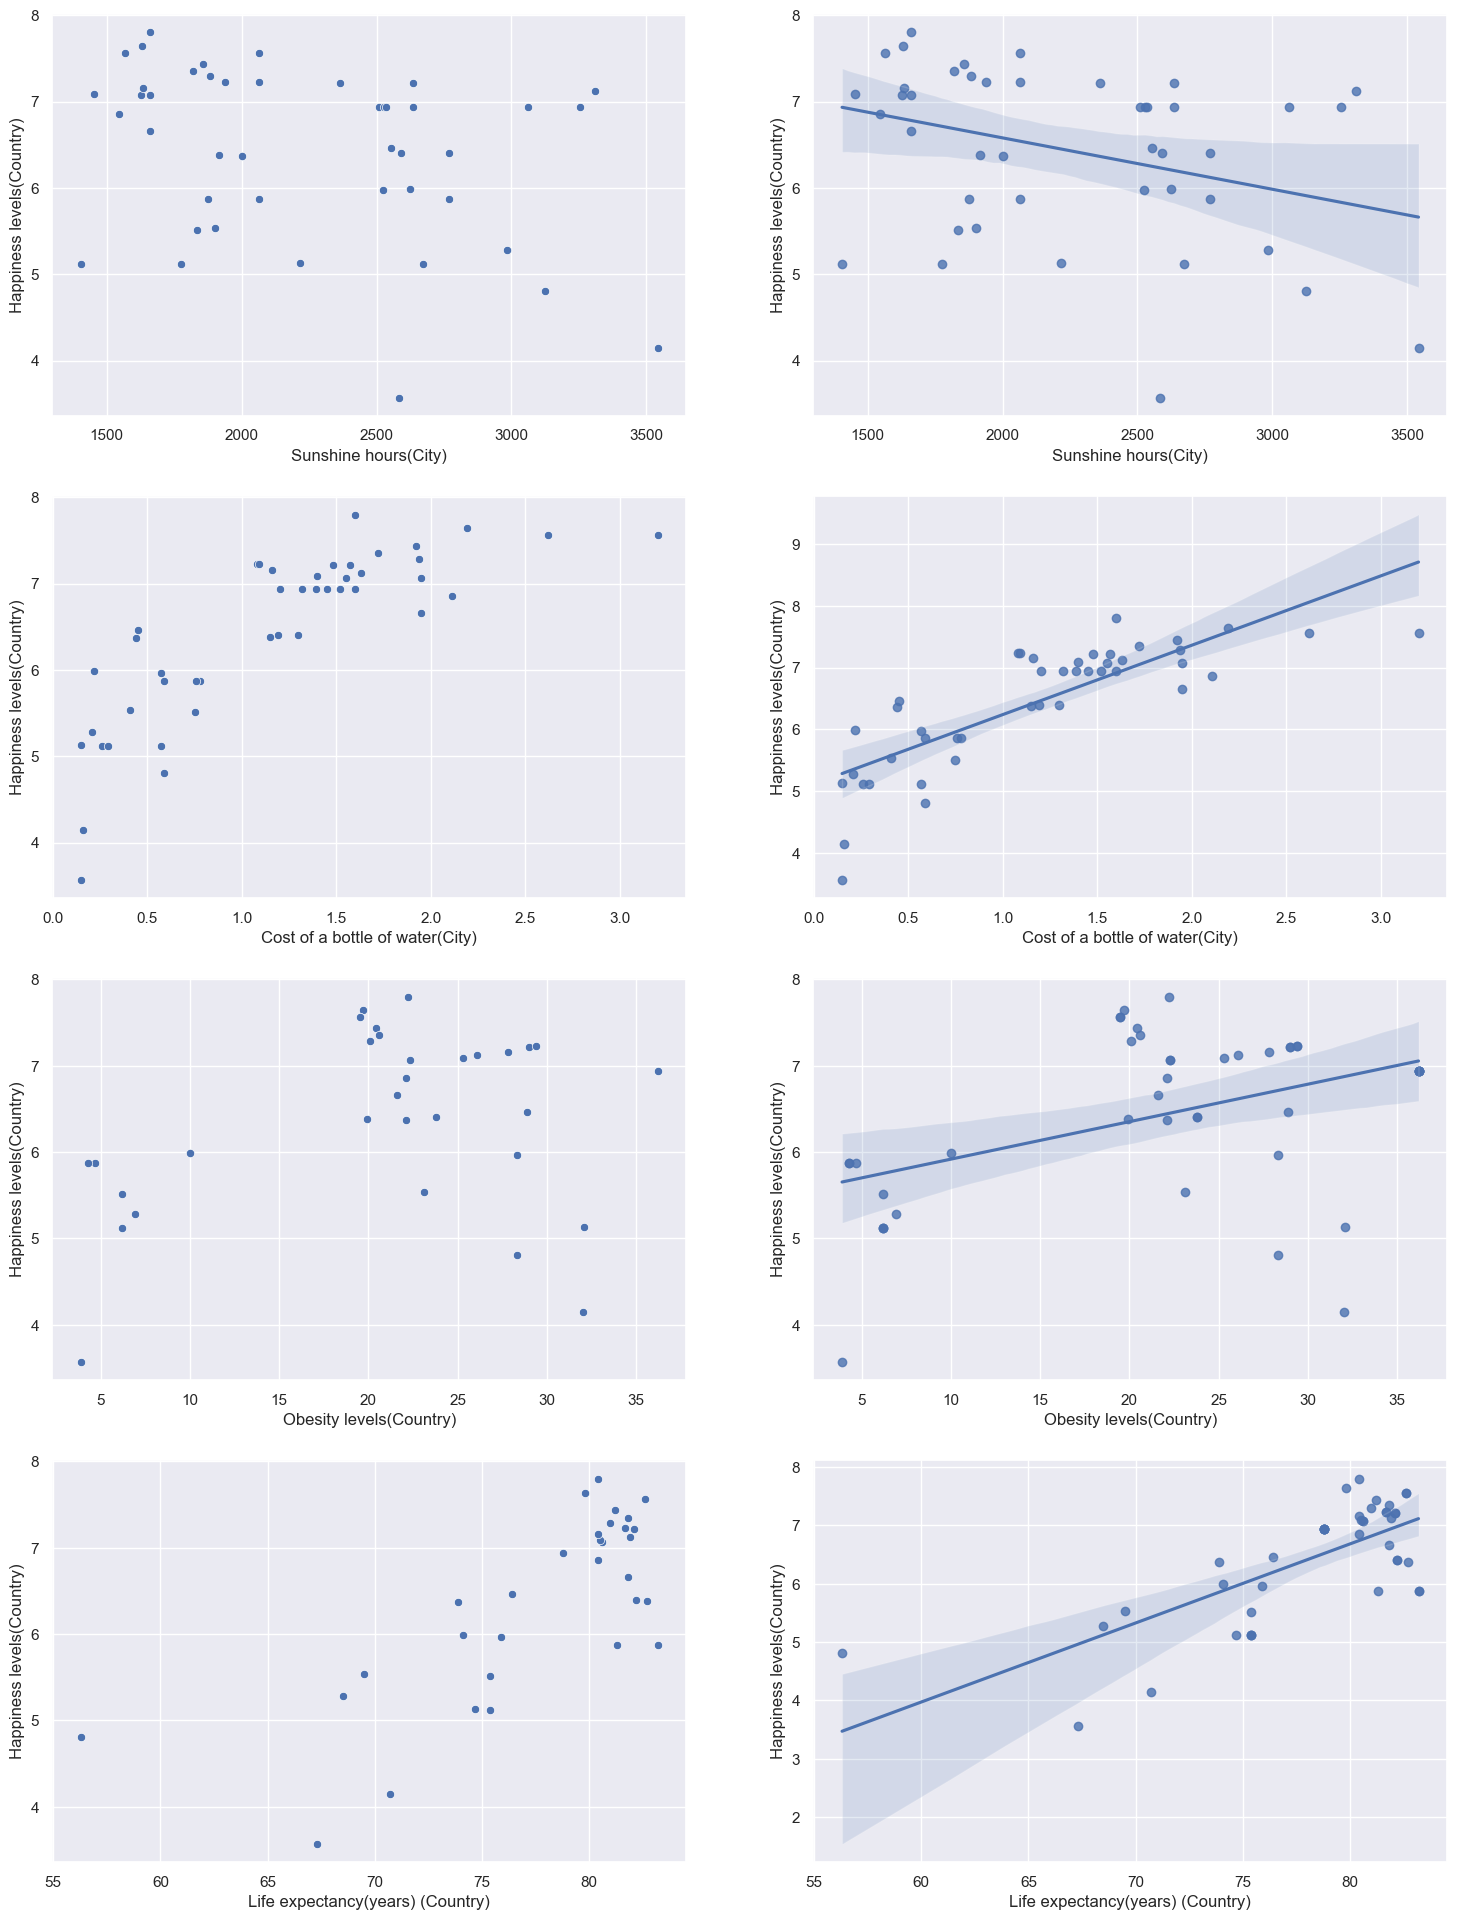

In [14]:
f, axes = plt.subplots(4, 2, figsize=(18, 24))

CityDataEDACopy = CityDataEDA.copy()
y = CityDataEDACopy['Happiness levels(Country)']
CityDataEDACopy = CityDataEDACopy.drop('Happiness levels(Country)', axis=1)

CityDataEDACopy1 = CityDataEDACopy.iloc[:, 0:4]

count = 0
for var in CityDataEDACopy1:
    sb.scatterplot(data=CityDataEDACopy1 , x= CityDataEDACopy1[var], y = y, ax = axes[count,0])
    sb.regplot(data=CityDataEDACopy1 , x= CityDataEDACopy1[var] ,  y = y, ax = axes[count,1])
    count +=1
    
plt.show()

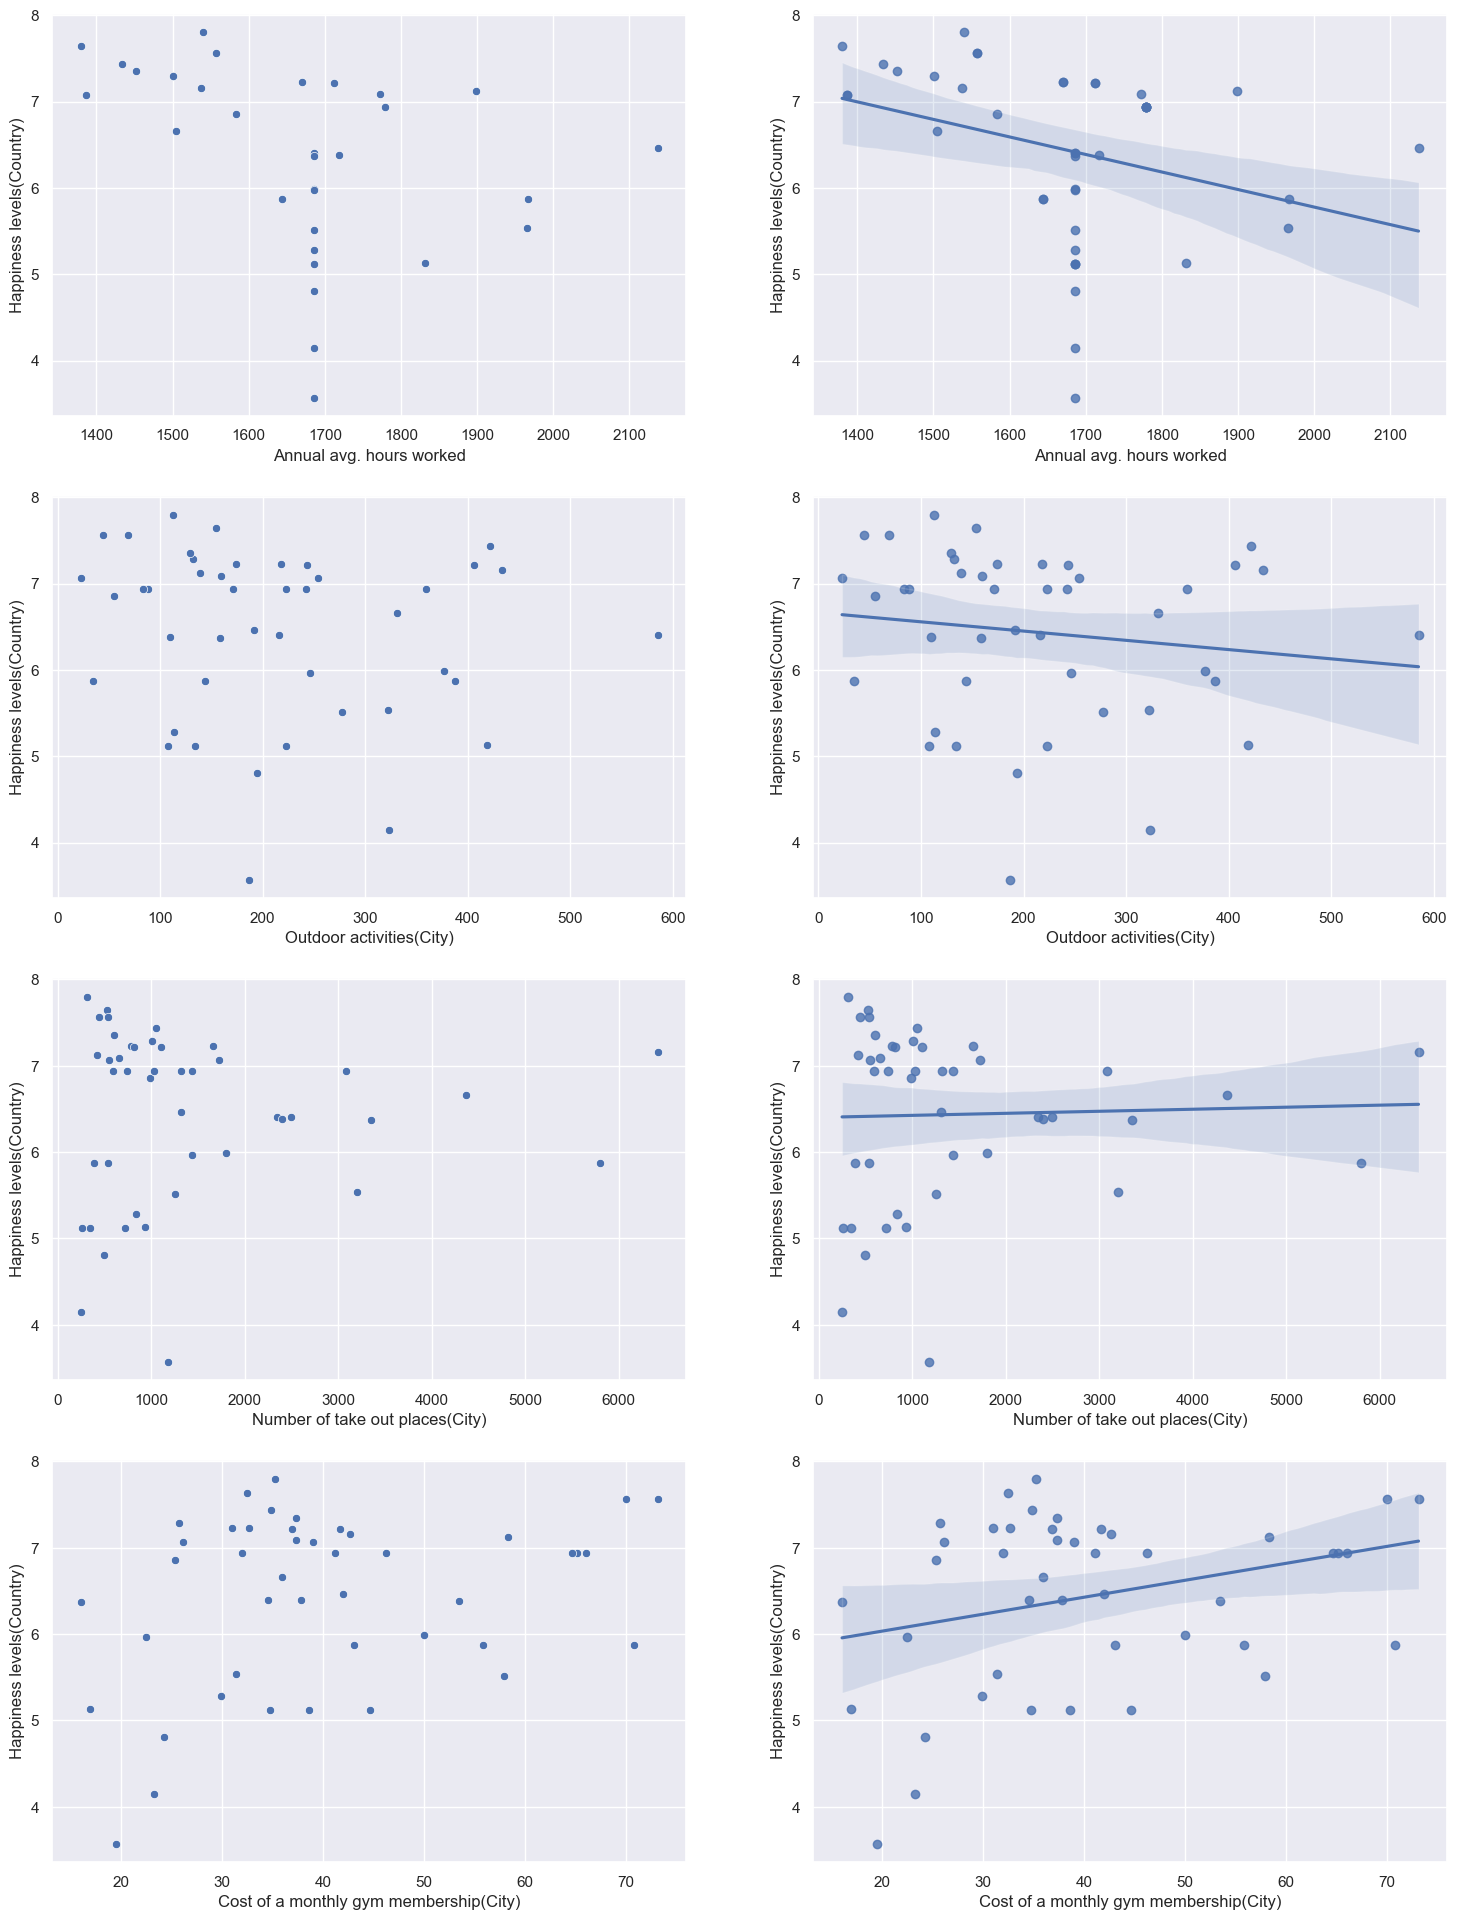

In [15]:
CityDataEDACopy2 = CityDataEDACopy.iloc[:, 5:10]

f, axes = plt.subplots(4, 2, figsize=(18, 24))

count = 0
for var in CityDataEDACopy2:
    sb.scatterplot(data=CityDataEDACopy2 , x= CityDataEDACopy2[var], y = y, ax = axes[count,0])
    sb.regplot(data=CityDataEDACopy2 , x= CityDataEDACopy2[var] ,  y = y, ax = axes[count,1])
    count +=1
    
plt.show()

## Insights from the Exploratory Data Analysis

After plotting the Individual Variables Box, Violin and Histogram plot and their Correlation Heat Map, we noticed: 


1. Variables with high Correlation with each other are : 

> `Cost of a bottle of water (City)` & `Happiness levels` , `Pollution` , `Life Expectancy`

> `Life Expectancy` & `Happiness levels`

> `Pollution` & `Happiness levels`, 

2. Variables that have high Correlation with `Happiness Level (City)` are :

> `Cost of a bottle of water(City)` = 0.81 

> `Obesity levels(Country)` = 0.45

> `Life expectancy(years) (Country)` = 0.72 

> `Pollution(Index score) (City)` = -0.76

## Part 3 : Linear Regression

Now that we have gained relavant insights from the EDA, we will use a Machine Learning to answer the first question of our Project. 

**Problem Forumlation** : How can we expect the happiness of a country , given related health metrics of it? 

**Data Science Question** : Are we able to predict the `Happiness Levels (City)` of a city based on its other metrics? 


The Machine Learning Model of our choice would be Multi-Variate Linear Regression Model. 

Before we start with the Multi-Variate Linear Regresion, we would first choose the 4 best variables to predict the response. 

The choice of 4 variables is to prevent possible overfitting and allows us to rely on the model in the future, should there be more variables added to the data set. This allows for a good predictor of the response, as we take a sample number of variables that represents the data best. 

In order to choose these best 4 variables, we use the Select K-Best Method to ensure that a more accurate choice of the variables, rather than just choosing the 4 variables based on its correlation with the response. This allows for other possible metrics in the variable to be considered as well. 

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression

X = CityDataEDA
y = y

# Initialize SelectKBest with f_regression as the scoring function and k=4
selector = SelectKBest(score_func=f_regression, k=4)

# Fit the selector to your data
selector.fit(X, y)

# Get the selected features
selected_features = selector.get_support(indices=True)

# Create a new DataFrame with the selected features
X_selected = X.iloc[:, selected_features]

print("Selected features:\n")
for a in X.columns[selected_features] :
    print(a)

Selected features:

Cost of a bottle of water(City)
Obesity levels(Country)
Life expectancy(years) (Country)
Pollution(Index score) (City)


From the above , we see that the 4 variables align with the Top 4 variables that are high in correlation with `Happiness Levels (City)`. 

We will use these 4 variables as our predictors. 

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()

In [18]:
X = CityData[['Life expectancy(years) (Country)', "Cost of a bottle of water(City)", "Pollution(Index score) (City)", "Obesity levels(Country)"]]
y = CityData['Happiness levels(Country)']

# Random Train - Test Split
X_Train = X.sample(frac=0.80, random_state=1)
y_Train = y.sample(frac=0.80, random_state=1)

x_Test = X.drop(X_Train.index)
y_Test = y.drop(y_Train.index)

In [19]:
# Training the Model 
linreg.fit(X_Train, y_Train)
model = LinearRegression().fit(X_Train, y_Train)

Once we have fitted the model, we would now evaluate the model. 

Since it's a Multi-Variate Plot, the plot of it would be a 3-D Graph 

In [20]:
print("Train MSE: ", mean_squared_error(y_Train, linreg.predict(X_Train)))
print("Train R^2 Score : ",r2_score(y_Train, linreg.predict(X_Train)))

Train MSE:  0.124219056057852
Train R^2 Score :  0.8755272837880652


In [21]:
print("Test MSE: ", mean_squared_error(y_Test, linreg.predict(x_Test)))
print( "R^2 Score : ", r2_score(y_Test, linreg.predict(x_Test)))

Test MSE:  0.3355017259230578
R^2 Score :  0.580833719459536


The Explained Variance that we got from is 0.58. 

The Explained Variance of the model on the Train Data Set is rather high at 0.87. This could mean that there is an overfitting of the model, given a lower Explained Variance of the of model on the Test Data Set.

This could be a problem , as our model is overfitted and would not allow us to accurately predict results of other cities, and destroys the purpose of doing our Linear Regression analysis. 


### We will now explore 2 methods on how we can reduce overfitting of the Model

1. 

The first method we will try is the K-Folds Validation method. Given a small dataset, using a traditional train-test split could lead to insufficient data for training, which might affect the model's performance. K-fold cross-validation helps maximize the use of the available data by iteratively using different parts of the data for training and validation, ensuring that every sample is used for both training and validation at some point.

To find the optimal K-Fold value, we will iterate through the Number of folds and find the optimal R^2 and MSE value.

In [22]:
from sklearn.model_selection import KFold, cross_val_score

best_k = None
best_r2 = -np.inf
best_mse = np.inf

for k in range(2, 11):
    kfold = KFold(n_splits=k, random_state=1, shuffle=True)
    model = LinearRegression()

    mse_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
    r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2', n_jobs=-1)

    mse = -np.mean(mse_scores)
    r2 = np.mean(r2_scores)

    if r2 > best_r2:
        best_k = k
        best_r2 = r2
        best_mse = mse

    print(f"K: {k} | Test MSE: {mse} | Test R^2 Score: {r2}")

print(f"Best fold value: {best_k}")
print(f"Test MSE for best fold value: {best_mse}")
print(f"Test R^2 Score for best fold value: {best_r2}")

K: 2 | Test MSE: 0.26490048469556804 | Test R^2 Score: 0.7257237394745109
K: 3 | Test MSE: 0.20643718864981286 | Test R^2 Score: 0.7622210782714304
K: 4 | Test MSE: 0.21030658495084692 | Test R^2 Score: 0.7700452344328301
K: 5 | Test MSE: 0.20541642737434246 | Test R^2 Score: 0.7659871871580514
K: 6 | Test MSE: 0.2039888744595705 | Test R^2 Score: 0.7081197907695244
K: 7 | Test MSE: 0.2303050883377933 | Test R^2 Score: 0.6945380042851467
K: 8 | Test MSE: 0.23706109315889073 | Test R^2 Score: 0.49089339013002947
K: 9 | Test MSE: 0.22616598891997125 | Test R^2 Score: 0.45323675057317697
K: 10 | Test MSE: 0.2248308008905208 | Test R^2 Score: 0.47686422805349726
Best fold value: 4
Test MSE for best fold value: 0.21030658495084692
Test R^2 Score for best fold value: 0.7700452344328301


What we got was an array of Explained Variance Score and we evaluate the mean.

The new Explained Variance we got was 0.77 on the Test Data, which is much better compared to the first evaluation. This shows that K-Folds does help us in reducing overfitting of the Train Model! 

2. The second method of our choice would be using L1 regularization which reduces overfitting by adding a penalty term to the loss function that encourages the model to select only the most important features and set the coefficients of less important features to zero.

This is desirable in our case as there are high Multicollinearity between the predictors as shown in the EDA.

In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

X = CityDataEDA[['Life expectancy(years) (Country)', "Cost of a bottle of water(City)", "Pollution(Index score) (City)", "Obesity levels(Country)"]]
y = CityDataEDA['Happiness levels(Country)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)


print("Lasso coefficients: ", lasso.coef_)

print("Test MSE : " , np.mean((y_pred - y_test) ** 2))
print("Test R^2 Score: " , lasso.score(X_test, y_test))


Lasso coefficients:  [ 0.06963709  0.         -0.02181478  0.02427649]
Test MSE :  0.2756091300818091
Test R^2 Score:  0.7952079580310528


A lower MSE using Lasso Model means that the model is able to better capture the underlying patterns in the test data, even though it may introduce some bias and increase the average squared error.


## Conclusion of Multi-Variate Linear Regression

--- 
By choosing good variables to work with and fine-tuning the model, we were able to capture more noise in the data. This allows us to fit the model appropriately onto the data without introducing alot of biasness into it that may lead to overfitting. 

Improving the reliance of the model allows us to better handle future variables that are added into the data set, as we have made this model accountable to the variatations in the data.

## Part 4 : Clustering

Now that we have completed answering our first problem in our Problem formulation and its related Data Science Question, we will now look into the next part of our Problem Formulation.


**Problem Forumlation** : What factors determine if a Country is happy and having a high life expectency?

**Data Science Question** : What are the characterstics between Clusters of cities, where we cluster them based on `Happiness Levels` and `Life Expectency`.


For this Data Science Question, we will use Hierachical Clustering with its Bottom Up approach to analyse countries that are similar in terms of this 2 variables. 


The dendrogram of Hierachal modeling also offers us a powerful visual aid that helps us determine how similar are Cities to each other by examining the vertical distances - Which is the goal of our Data Science Question.


For Hierachal Clustering, we will first plot the dendrogram and use the 'Ward' Method.

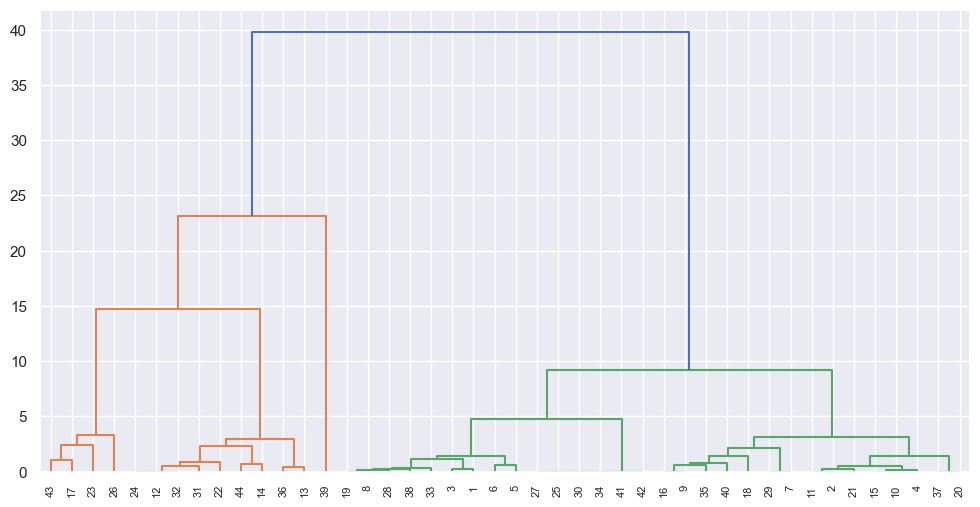

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

selectedColumns = [
    "Life expectancy(years) (Country)",  
    "Happiness levels(Country)"]

dataSelected = CityData[selectedColumns]

linked = linkage(dataSelected, method = 'ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, labels = CityData['Rank'].tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)


plt.show()

How to analyse the Dendrogram: 

--- 

1. Each leaf node represents a City (Index of the City In this Case) 

2. Starts from leaf nodes, if 2 nodes have great similarities, then they would merge early and their vertical heights are short 

3. Each Horizontal Line represents a cluster.


### Analysis of the plot :

--- 
Hierachal Clustering : 

1. We can see that there are 2 main clusters , and in these 2 main clusters, there are another 2 smaller clusters in each. Again, the anomaly city indexed `39` is seen, accounting for one of the clusters. 


2. From the dendrogram, we can easily see the cities that cluster together base on similar characteristics much more easily compared to KMeans 

### Analysis of Clusters : 

Now we will determine the optimal number of clusters and analyse the characteristic of each cluster. 

In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


dataSelected = CityData[selectedColumns]

# Find the optimal number of clusters based on silhouette score
max_clusters = 10
best_score = -1
best_num_clusters = 0

for num_clusters in range(2, max_clusters + 1):
    clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    labels = clustering.fit_predict(dataSelected)
    
    silhouette_avg = silhouette_score(dataSelected, labels)
    
    print(f"Silhouette score for {num_clusters} clusters: {silhouette_avg}")
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_num_clusters = num_clusters

print(f"Optimal number of clusters: {best_num_clusters}")

Silhouette score for 2 clusters: 0.6576391012272846
Silhouette score for 3 clusters: 0.670859039327596
Silhouette score for 4 clusters: 0.6757119529471023
Silhouette score for 5 clusters: 0.5687071443965532
Silhouette score for 6 clusters: 0.5927147169560756
Silhouette score for 7 clusters: 0.5592948152729238
Silhouette score for 8 clusters: 0.5550807465035132
Silhouette score for 9 clusters: 0.5328036323015053
Silhouette score for 10 clusters: 0.5303620989898572
Optimal number of clusters: 4


In [26]:
from scipy.cluster.hierarchy import fcluster


clusterLabels = fcluster(linked, 4, criterion='maxclust')
CityData['Cluster'] = clusterLabels
CityData

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Cluster
0,Amsterdam,1,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,34.90,1
1,Sydney,2,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406,1103,41.66,1
2,Vienna,3,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132,1008,25.74,1
3,Stockholm,4,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129,598,37.31,1
4,Copenhagen,5,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,32.53,1
5,Helsinki,6,1662.0,1.60,22.2,80.4,13.08,1540.0,7.80,113,309,35.23,1
6,Fukuoka,7,2769.0,0.78,4.3,83.2,52.64,1644.0,5.87,35,539,55.87,1
7,Berlin,8,1626.0,1.55,22.3,80.6,39.41,1386.0,7.07,254,1729,26.11,1
8,Barcelona,9,2591.0,1.19,23.8,82.2,65.19,1686.0,6.40,585,2344,37.80,1
9,Vancouver,10,1938.0,1.08,29.4,81.7,24.26,1670.0,7.23,218,788,31.04,1


We will now analyse the 4 clusters of Hierachcal Clustering and look at its trends.

**Analysis of Clusters**

---

Ranking of Happpiness level & Life Expectency:

Cluster 1 , Cluster 2 , Cluster 3 , Cluster 4 (Anomaly) 

In [27]:
cluster_1 = CityData[CityData['Cluster'] == 1]
cluster_2 = CityData[CityData['Cluster'] == 2]
cluster_3 = CityData[CityData['Cluster'] == 3]
cluster_4 = CityData[CityData['Cluster'] == 4]

clusters_summary = CityData.groupby('Cluster').mean()

for cluster in clusters_summary.index :
    print(f"Cluster {cluster}:")
    print()
    cluster_data = clusters_summary.loc[cluster]
    
    for variable, value in cluster_data.items():
        print(f"{variable}: {value}")
    print("\n")

Cluster 1:

Rank: 20.466666666666665
Sunshine hours(City): 2163.0333333333333
Cost of a bottle of water(City): 1.547
Obesity levels(Country): 24.143333333333334
Life expectancy(years) (Country): 81.02666666666667
Pollution(Index score) (City): 41.051
Annual avg. hours worked: 1642.4
Happiness levels(Country): 6.966666666666667
Outdoor activities(City): 204.7
Number of take out places(City): 1537.3
Cost of a monthly gym membership(City): 44.218333333333334


Cluster 2:

Rank: 25.333333333333332
Sunshine hours(City): 2179.222222222222
Cost of a bottle of water(City): 0.4111111111111111
Obesity levels(Country): 16.244444444444444
Life expectancy(years) (Country): 75.17777777777778
Pollution(Index score) (City): 71.21555555555557
Annual avg. hours worked: 1752.3333333333333
Happiness levels(Country): 5.6433333333333335
Outdoor activities(City): 237.11111111111111
Number of take out places(City): 1268.2222222222222
Cost of a monthly gym membership(City): 35.946666666666665


Cluster 3:

Ran

### Analysis of Clusters

--- 

The clusters are ranked based on their `Happiness Levels` & `Life Expectency`. Higher levels of both indicates a higher Cluster Rank. 

1. We notice that Cities with low `Pollution Index` and `Annual avg. hours worked` indicates a higher `Happiness Levels` and `Life Expectency`. This is true for all clusters , which would indicate that `Pollution Index` and `Annual avg. hours worked` are strong indicators of a country's Happiness and Life Expectency Level 


2. As a city shows greater `Happiness Levels` and `Life Expectency`, cost of living of the city could potentailly be higher, as indicated by `Cost of a bottle of water`, `Cost of a monthly gym membership`. 


3. We notice that 1 cluster is made up of 1 City only - This is an anomaly. This city is identified as `Johannesburg`. It has the lowest life expectancy (56.3 years) and lowest happiness levels (4.81).



### Data Science Question 3

---

Now we will proceed with our final Data Science problem which is 


**Problem Forumlation** : What cities are similar to each other based on their health variables? 

**Data Science Question** : Is there a structure within the Cities of the data set? 


To answer this question, we will cluster the cities using all of its metrics and analyse the clusters the cities belong to. We will use Hierachal Clustering to easily see how similar are Cities to one another via the Dendrogram

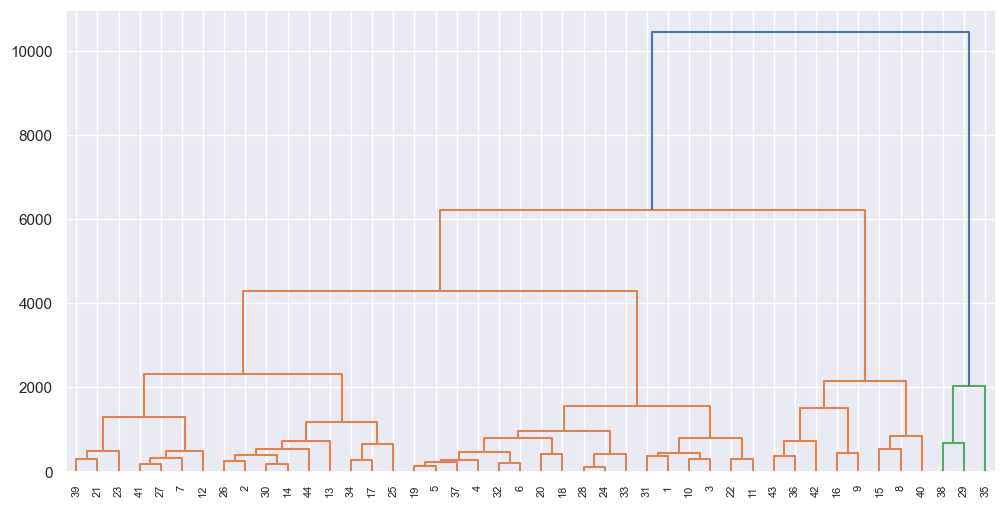

In [28]:

dataSelected = CityData[["Sunshine hours(City)", "Cost of a bottle of water(City)",
                                     "Obesity levels(Country)", "Life expectancy(years) (Country)", 
                                     "Pollution(Index score) (City)", "Annual avg. hours worked",
                                     "Happiness levels(Country)","Outdoor activities(City)",
                                     "Number of take out places(City)", "Cost of a monthly gym membership(City)"]]


linked = linkage(dataSelected, method = 'ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, labels = CityData['Rank'].tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

In [29]:
# Find the optimal number of clusters based on silhouette score
max_clusters = 10
best_score = -1
best_num_clusters = 0

for num_clusters in range(2, max_clusters + 1):
    clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    labels = clustering.fit_predict(dataSelected)
    
    silhouette_avg = silhouette_score(dataSelected, labels)
    
    print(f"Silhouette score for {num_clusters} clusters: {silhouette_avg}")
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_num_clusters = num_clusters

print(f"Optimal number of clusters: {best_num_clusters}")

Silhouette score for 2 clusters: 0.6856327518337856
Silhouette score for 3 clusters: 0.46303297582371655
Silhouette score for 4 clusters: 0.40758905791159167
Silhouette score for 5 clusters: 0.38352385500092134
Silhouette score for 6 clusters: 0.37258698543835395
Silhouette score for 7 clusters: 0.3671342879073945
Silhouette score for 8 clusters: 0.30425778819053356
Silhouette score for 9 clusters: 0.3177168781928667
Silhouette score for 10 clusters: 0.320038085729754
Optimal number of clusters: 2


In [30]:
clusterLabels = fcluster(linked, 2, criterion='maxclust')
CityData['Cluster'] = clusterLabels

cluster_1 = CityData[CityData['Cluster'] == 1]
cluster_2 = CityData[CityData['Cluster'] == 2]

clusters_summary = CityData.groupby('Cluster').mean()

for cluster in clusters_summary.index :
    print(f"Cluster {cluster}:")
    print()
    cluster_data = clusters_summary.loc[cluster]
    
    for variable, value in cluster_data.items():
        print(f"{variable}: {value}")
    print("\n")

Cluster 1:

Rank: 34.0
Sunshine hours(City): 1724.0
Cost of a bottle of water(City): 1.29
Obesity levels(Country): 17.900000000000002
Life expectancy(years) (Country): 81.8
Pollution(Index score) (City): 55.61666666666667
Annual avg. hours worked: 1562.3333333333333
Happiness levels(Country): 6.5633333333333335
Outdoor activities(City): 383.6666666666667
Number of take out places(City): 5527.333333333333
Cost of a monthly gym membership(City): 49.81999999999999


Cluster 2:

Rank: 21.658536585365855
Sunshine hours(City): 2279.6585365853657
Cost of a bottle of water(City): 1.1648780487804877
Obesity levels(Country): 22.21951219512195
Life expectancy(years) (Country): 77.90975609756099
Pollution(Index score) (City): 50.830487804878054
Annual avg. hours worked: 1684.5121951219512
Happiness levels(Country): 6.425609756097561
Outdoor activities(City): 201.5609756097561
Number of take out places(City): 1144.2682926829268
Cost of a monthly gym membership(City): 39.73219512195122




Since there are only 2 clusters to analyse, to help us analyse the details of the cluster better, we will find out the importance of each variable that contributes to the clustering structure. 


For the section, we will use Random Forest to help us quantify the importance of each feature based on how much it contributes to the accuracy of the Random Forest model.


Random Forest is an ensemble learning method that combines multiple decision trees to create a more accurate and robust model. Each decision tree in the random forest is built using a random subset of the input features and a random subset of the training data.


Feature importance is calculated by aggregating the importance of each feature across all the decision trees in the ensemble. The importance of a feature in a single decision tree is determined by how much that feature contributes to the tree's ability to make accurate predictions. It is measured by using the decrease in impurity or Gini impurity when splitting on that feature at each node.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = CityData[["Sunshine hours(City)", "Cost of a bottle of water(City)",
                                     "Obesity levels(Country)", "Life expectancy(years) (Country)", 
                                     "Pollution(Index score) (City)", "Annual avg. hours worked",
                                     "Happiness levels(Country)","Outdoor activities(City)",
                                     "Number of take out places(City)", "Cost of a monthly gym membership(City)"]]
y = CityData['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


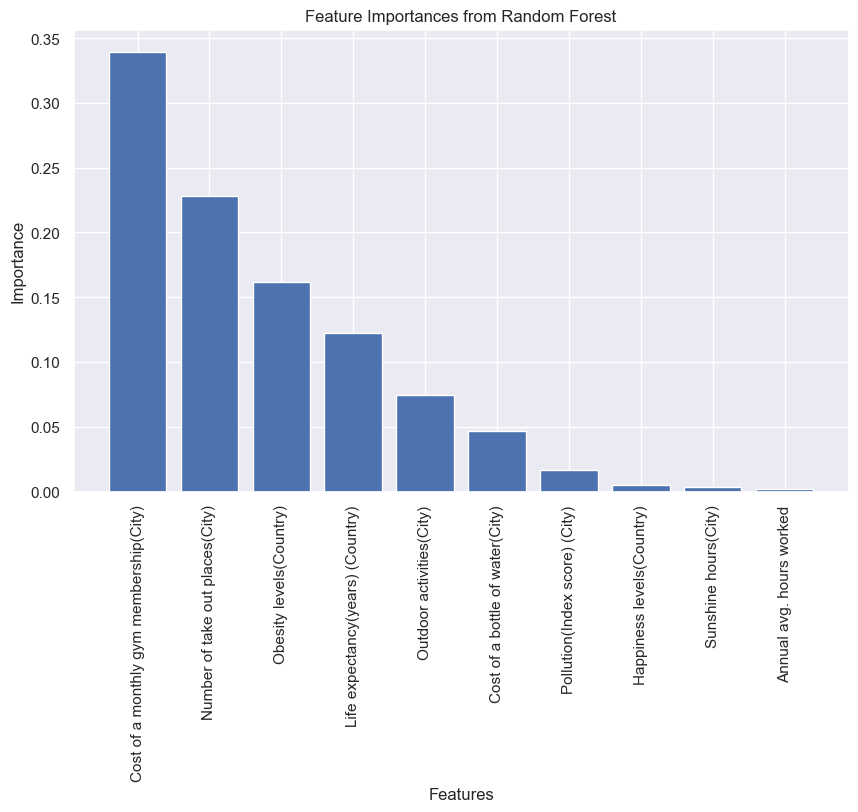

In [32]:
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Get the feature names
feature_names = X.columns

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_idx], rotation=90)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

In [33]:
# Get feature importances from the model
importances = rf_model.feature_importances_

# Create a DataFrame with the feature names and their corresponding importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance (descending)
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

                                  feature  importance
9  Cost of a monthly gym membership(City)    0.339671
8         Number of take out places(City)    0.228384
2                 Obesity levels(Country)    0.161926
3        Life expectancy(years) (Country)    0.122180
7                Outdoor activities(City)    0.074576
1         Cost of a bottle of water(City)    0.046433
4           Pollution(Index score) (City)    0.016269
6               Happiness levels(Country)    0.005322
0                    Sunshine hours(City)    0.003527
5                Annual avg. hours worked    0.001711


## Analysis of clusters 

---

1. From the dendrogram, we see that there are 2 primary clusters, with one clustering having only 3 cities while the other containing 41 others.


2. Cost of a monthly gym membership (City) (importance: 0.339671): Cities in Cluster 1 have a higher average cost of a monthly gym membership (49.82) compared to cities in Cluster 2 (39.73). 


3. Number of take-out places (City) (importance: 0.228384): Cities in Cluster 1 have a significantly higher number of take-out places (5527.33) compared to cities in Cluster 2 (1144.27). 


4. Obesity levels (Country) (importance: 0.161926): Countries in Cluster 1 have lower obesity levels (17.9) compared to countries in Cluster 2 (22.22).

5. Life expectancy (years) (Country) (importance: 0.122180): Countries in Cluster 1 have a higher life expectancy (81.8 years) than countries in Cluster 2 (77.91 years).


From the analysis of the 2 clusters and the feature importance analysis, we can see the reasons as to why is there a structure in the clustering and what is the structure. 


Countries that have high `Monthly Gym Membership` ,`Number of take-out places (City)` and `Life expectancy (years) (Country)` will most likely be clustered together compared to cities that are much lower in these factors. 


Cities that are clustered based on `Monthly Gym Membership` ,`Number of take-out places (City)` and `Life expectancy (years) (Country)` have higher `Happiness Levels`, which is insightful for Countries to look into if they want to improve their overall Happiness levels. 

---

## Part 5 : Data Driven Insights & Conclusion

From our EDA and Machine Learning, we are able to gain insights for our Data Science Question: 


> 1. From our MultiVariate Analysis, we found that `Cost of a bottle of water(City)` , `Obesity levels(Country)`, `Life expectancy(years) (Country)`, `Pollution(Index score) (City)` to be good predictors, which would allow countries to predict `Happiness Levels` of their countries.

>>Furthermore, after exploring ways to reduce the overfitting, we found that using Lasso Regression allows us to obtain a higher Explained Variance at the cost of slightly higher Mean Square Error. This means that we were able to capture more noise in the Data but perform slighly worse in the predicting the actual values. 

>>This means that it was better than our original model, as it was able to reduce the overfitting by a larger margin and keeping the loss in predicting low!


>2. From our Second Data Science Question, for Countries that are looking to improve their `Happiness Levels` and `Life expectancy(years) (Country)`, they should look to reduce `Pollution Index` and `Annual avg. hours worked` as they are important features in determining if a City is healthy and happy. 


>3. From the last Data Science Question, we see that Cities that are clustered based on `Monthly Gym Membership` ,`Number of take-out places (City)` and `Life expectancy (years) (Country)` have higher `Happiness Levels`, which are possible avenues for Countries to look at if they want to improve their Countries Happiness Levels.


Conclusion of Clustering: 

`Cost of a monthly gym membership(City)`,`Number of take out places(City)`,`Obesity levels(Country)` and `Life expectancy(years) (Country)` are the most important factors in determining if the structure in the Data.


It differs from the variables of MultiVariate analysis as it assumes linearity between the features and the target variable. Whereas for Clustering with the use of Random Forest to determine Variable Importance, it can capture complex, non-linear relationships between features and the target variable, which is the primary goal of the Second and Third Data Science Question to capture the overall relationship. 